# 계산과학

### 1. for loop와 EMT 계산을 이용하여 H2, N2, O2의 결합 길이에 따른 에너지 변화를 그래프로 그리시오

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from ase import Atoms
from ase.calculators.emt import EMT
from ase.calculators.calculator import Calculator
from ase.neighborlist import neighbor_list
from ase.visualize import view
from ase.build import molecule
from ase.constraints import FixAtoms
from ase.optimize import BFGS
from ase.optimize import QuasiNewton

from scipy.optimize import curve_fit

from ase.build import fcc111, add_adsorbate, graphene_nanoribbon

from mpl_toolkits.mplot3d import Axes3D

N2 molecule energy at distance 0.5 Å: 9.87 eV
N2 molecule energy at distance 0.6 Å: 5.59 eV
N2 molecule energy at distance 0.7 Å: 2.86 eV
N2 molecule energy at distance 0.8 Å: 1.26 eV
N2 molecule energy at distance 0.9 Å: 0.48 eV
N2 molecule energy at distance 1.0 Å: 0.26 eV
N2 molecule energy at distance 1.1 Å: 0.44 eV
N2 molecule energy at distance 1.2 Å: 0.88 eV
N2 molecule energy at distance 1.3 Å: 1.47 eV
N2 molecule energy at distance 1.4 Å: 2.15 eV
N2 molecule energy at distance 1.5 Å: 2.87 eV
N2 molecule energy at distance 1.6 Å: 3.59 eV
N2 molecule energy at distance 1.7 Å: 4.29 eV
N2 molecule energy at distance 1.8 Å: 4.95 eV
N2 molecule energy at distance 1.9 Å: 5.56 eV
N2 molecule energy at distance 2.0 Å: 6.12 eV
N2 molecule energy at distance 2.1 Å: 6.63 eV
N2 molecule energy at distance 2.2 Å: 7.09 eV
N2 molecule energy at distance 2.3 Å: 7.50 eV
N2 molecule energy at distance 2.4 Å: 7.86 eV
N2 molecule energy at distance 2.5 Å: 8.18 eV
N2 molecule energy at distance 2.6

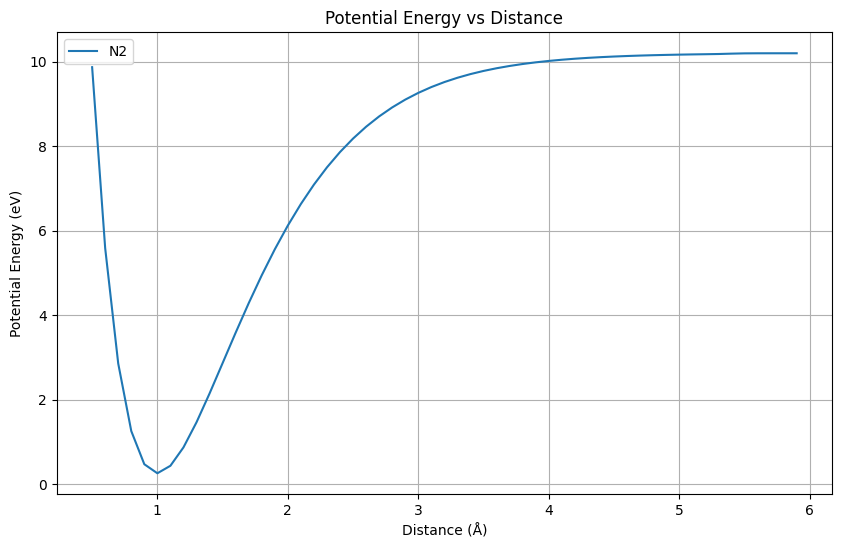

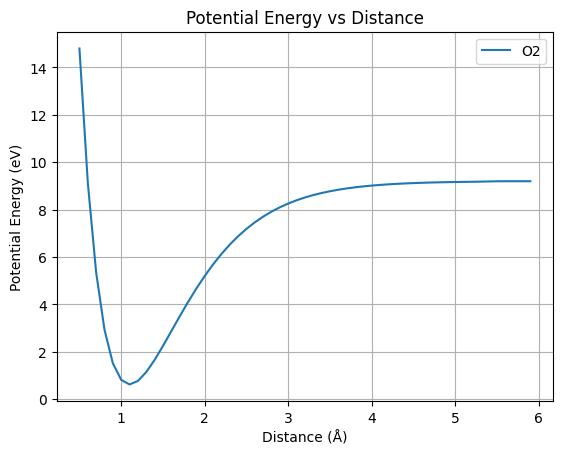

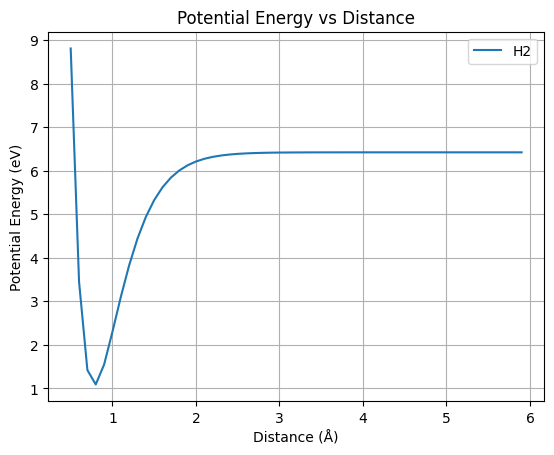

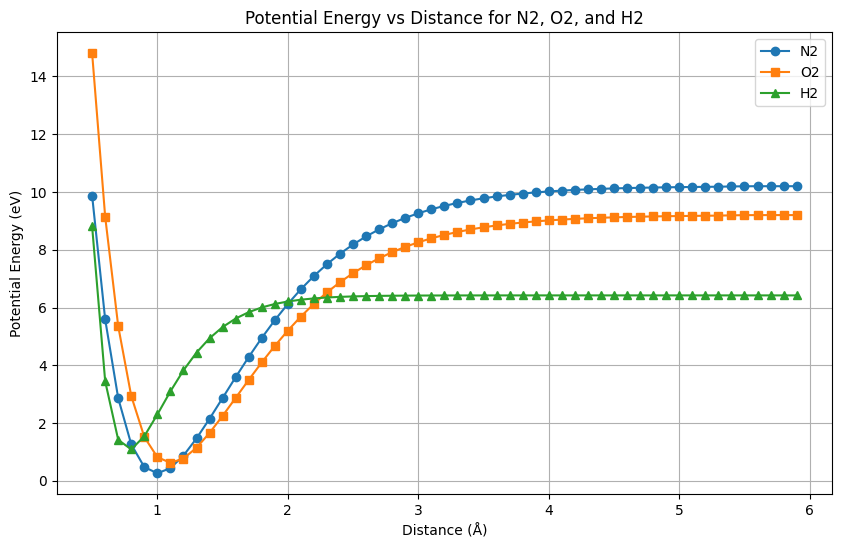

In [5]:
import numpy as np
from ase import Atoms
from ase.calculators.emt import EMT

class Energy:
    def __init__(self, mol):
        self.mol = mol
        self.d_list = np.arange(0.5, 6.0, 0.1)
        self.e_list = []

        for d in self.d_list:
            # Create molecule based on the formula
            molecule = Atoms(self.mol, [(0, 0, 0), (0, 0, d)])
            molecule.calc = EMT()
            e_molecule = molecule.get_potential_energy()
            self.e_list.append(e_molecule)
            print(f'{self.mol} molecule energy at distance {d:.1f} Å: {e_molecule:.2f} eV')

    def plot_energy(self):
        plt.plot(self.d_list, self.e_list, label=self.mol)
        plt.xlabel('Distance (Å)')
        plt.ylabel('Potential Energy (eV)')
        plt.title('Potential Energy vs Distance')
        plt.legend()
        plt.grid()
        plt.show()

# Create instances for N2, O2, and H2
N2 = Energy("N2")
O2 = Energy("O2")
H2 = Energy("H2")

# Plotting energies
plt.figure(figsize=(10, 6))
N2.plot_energy()
O2.plot_energy()
H2.plot_energy()
plt.show()

# Plotting energies on a single graph
plt.figure(figsize=(10, 6))
plt.plot(N2.d_list, N2.e_list, label='N2', marker='o')
plt.plot(O2.d_list, O2.e_list, label='O2', marker='s')
plt.plot(H2.d_list, H2.e_list, label='H2', marker='^')

plt.xlabel('Distance (Å)')
plt.ylabel('Potential Energy (eV)')
plt.title('Potential Energy vs Distance for N2, O2, and H2')
plt.legend()
plt.grid()
plt.show()

### 2. Cu, Pd, Pt 표면에서 H2 흡착 에너지를 구하시오

In [25]:
d = 1.1
metal = ['Cu','Pd','Pt']
for metal in metal:
    for h in np.arange(0.5,4.0,0.1):
        slab = fcc111(metal, size=(4,4,2), vacuum = 10.0)
        
        slab.calc = EMT()
        e_slab = slab.get_potential_energy()
        
        molecule = Atoms("H2", [(0,0,0),(0,d,0)])
        molecule.calc = EMT()
        e_mol = molecule.get_potential_energy()
        
        add_adsorbate(slab, molecule, h, 'ontop')
        constraint = FixAtoms(mask=[a.symbol == metal for a in slab])
        slab.set_constraint(constraint)
        e_slab_mol = slab.get_potential_energy()
        
    print(metal)
    print('Absorption energy : ' , e_slab + e_mol - slab.get_potential_energy())
    
    view(slab, metal)

Cu
Absorption energy :  0.032365767258347944
Pd
Absorption energy :  0.02475119294584971
Pt
Absorption energy :  0.03144281830209117


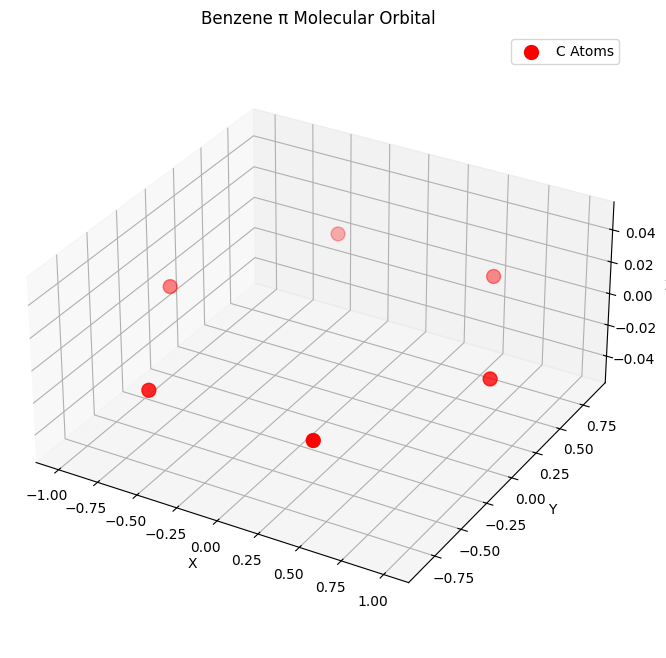

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm

# 벤젠 고리의 탄소 원자 좌표
def benzene_coordinates(radius=1.0):
    angles = np.linspace(0, 2 * np.pi, 7)[:-1]  # 0에서 2pi까지 6개의 점
    x = radius * np.cos(angles)
    y = radius * np.sin(angles)
    z = np.zeros_like(x)  # z 값은 모두 0
    return x, y, z

# π 오비탈을 구형 조화 함수로 표현
def psi_ang(phi, theta):
    # π 오비탈을 표현하는 함수 (구형 조화 함수)
    return (1/2) * (sph_harm(1, 1, phi, theta) + sph_harm(1, -1, phi, theta)).real

# 벤젠 π 오비탈 시각화
def plot_benzene_pi_orbital():
    # 벤젠의 탄소 원자 좌표
    x_c, y_c, z_c = benzene_coordinates()

    # 각 원자에 대한 구형 조화 함수 계산
    phi = np.linspace(0, 2 * np.pi, 100)  # azimuthal angle
    theta = np.linspace(0, np.pi, 100)     # polar angle
    phi, theta = np.meshgrid(phi, theta)

    # π 오비탈 계산
    r = psi_ang(phi, theta)

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # x, y, z 좌표 계산
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)

    # 원자 위치 추가
    ax.scatter(x_c, y_c, z_c, color='red', s=100, label='C Atoms')  # 탄소 원자 표시

    # 오비탈을 3D로 플로팅
    ax.plot_surface(x, y, z, rstride=5, cstride=5, alpha=0.6, edgecolor='k')
    ax.set_title('Benzene π Molecular Orbital')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_box_aspect([1, 1, 0.5])  # 비율 설정
    ax.legend()

    plt.show()

plot_benzene_pi_orbital()
